# Cap. 4 - Núcleo da Linguagem Python, Parte II

Este capítulo dá continuidade a apresentação da linguagem Python que começamos no Cap. 2.

## **Dicionários e conjuntos**

*Exemplo E4.9:* [Primo de Mersenne](https://en.wikipedia.org/wiki/Mersenne_prime) é um número primo que tem a forma:

$$2^i-1 \forall i\in(1,2,\dots)$$

Vamos encontrar esses primos fazendo a intersecção do conjunto de todos os primos com os números da lista anterior.

Para encontrar os primos, vamos usar o método do [*Crivo de Eratóstenes*](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes).

Veja o Problema **P2.5.8**

In [ ]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/8/8c/New_Animation_Sieve_of_Eratosthenes.gif')

In [ ]:
import math

def primes(n):

    #cria uma lista n valores True
    isprime = [True]*(n+1)

    #lista para armazenar os primos
    lprimes = []

    # marca 0 e 1 como não primos
    isprime[0] = isprime[1] = False

    # começa com 2, o primeiro primo
    isprime[2] = True

    for i, prime in enumerate(isprime):
        if prime:
            #salvamos o primo e marcamos os
            #múltiplos dele como não primos
            lprimes.append(i)
            #varre os múltiplos de i
            for m in range(i, (n+1), i):
                isprime[m] = False
    return lprimes

In [ ]:
print(primes(127))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127]


In [ ]:
n = 1000000
P = set(primes(n))

In [ ]:
math.log(n+1,2) + 1

20.931570012018494

In [ ]:
2**20

1048576

In [ ]:
A = set([2**i-1 for i in range(2, int(math.log(n+1,2) + 1))])

In [ ]:
M = P.intersection(A)
M

{3, 7, 31, 127, 8191, 131071, 524287}

In [ ]:
print(sorted(list(M)))

[3, 7, 31, 127, 8191, 131071, 524287]


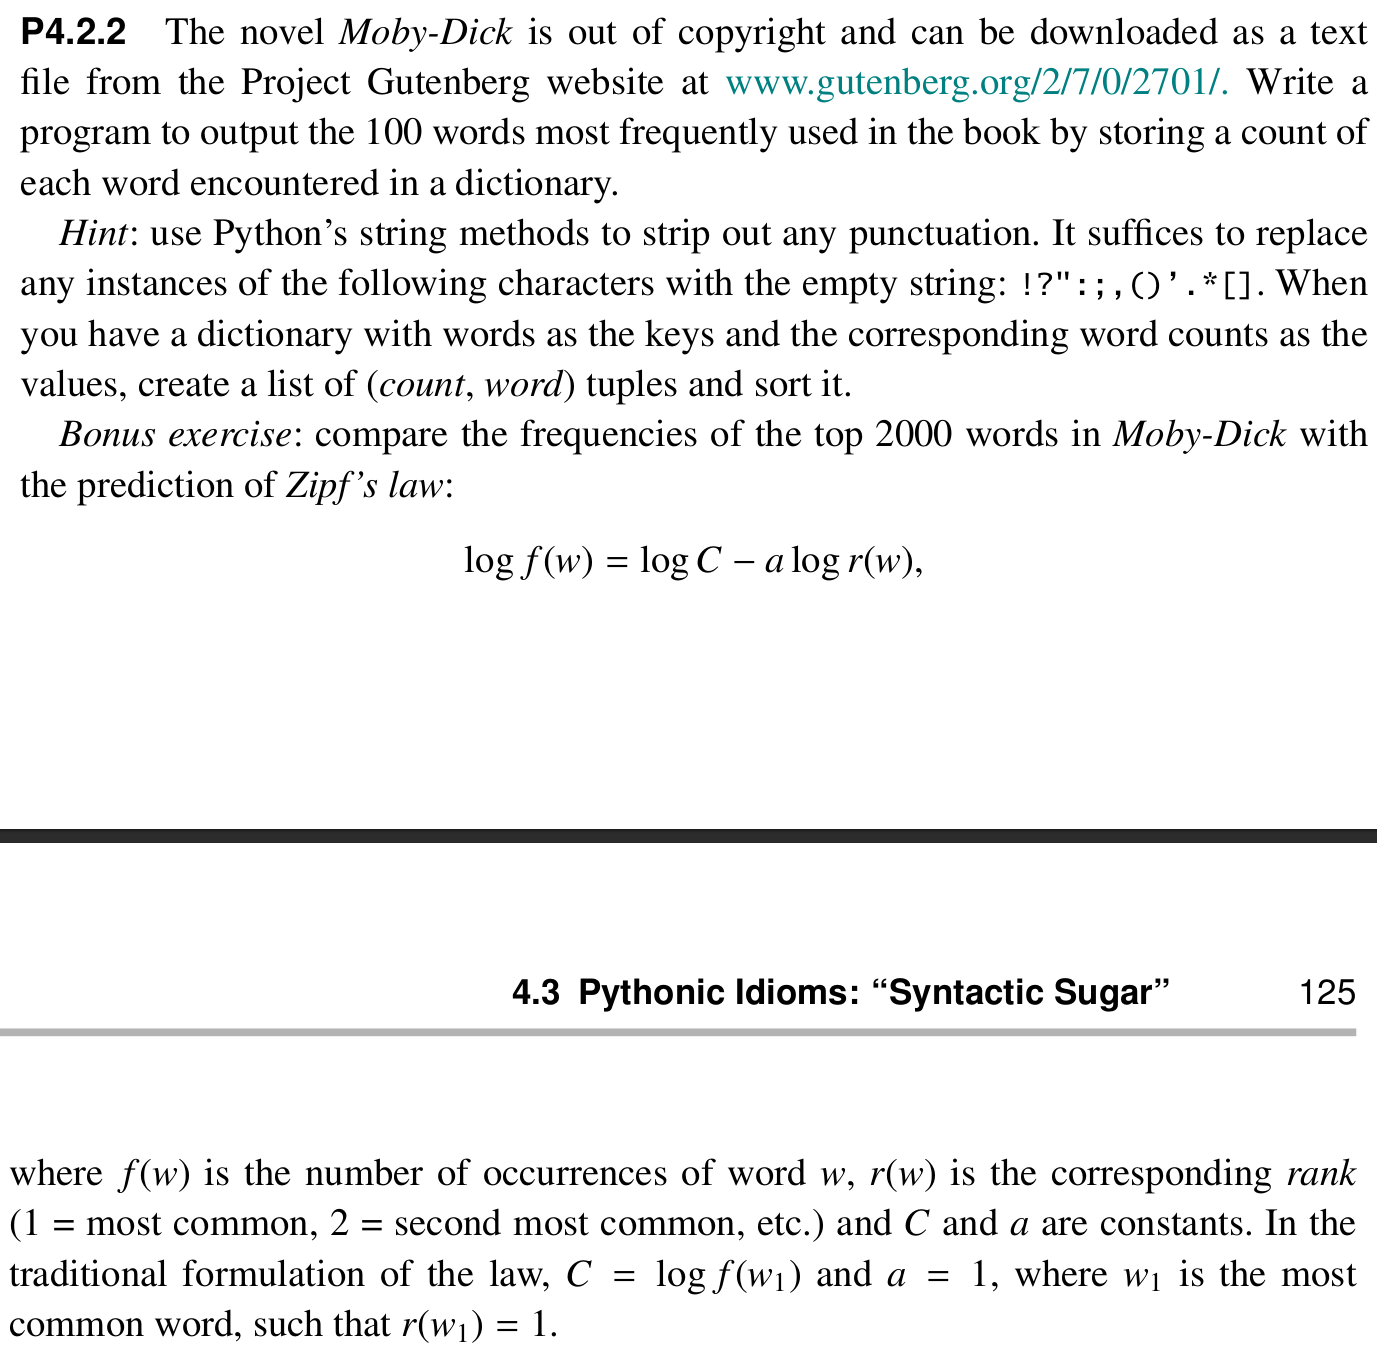

*Problema 4.2.2*: Lei de Zipf. Esse lei afirma que a frequência de palavras em um texto segue a forma:

$$
f(w) \sim r(w)^{-\alpha}
$$

na qual $f(w)$ é a frequência da palavra $w$, $r(w)$ é o seu ranqueamento ($r=1$ é a palavra mais frequente, $r=2$ é a segunda palavra mais frequente e assim por diante) e $\alpha\approx1$.

Vamos estimar essa lei para o livro Moby-Dick.

In [ ]:
#baixando os livros:
!wget https://www.gutenberg.org/files/2701/2701-0.txt
!wget http://pfi.uem.br/25anos/files/gsv.txt

--2023-12-08 00:34:42--  https://www.gutenberg.org/files/2701/2701-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1276235 (1.2M) [text/plain]
Saving to: ‘2701-0.txt’

2701-0.txt          100%[===================>]   1.22M  4.69MB/s    in 0.3s    

2023-12-08 00:34:43 (4.69 MB/s) - ‘2701-0.txt’ saved [1276235/1276235]

--2023-12-08 00:34:43--  http://pfi.uem.br/25anos/files/gsv.txt
Resolving pfi.uem.br (pfi.uem.br)... 186.233.153.195
Connecting to pfi.uem.br (pfi.uem.br)|186.233.153.195|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1117957 (1.1M) [text/plain]
Saving to: ‘gsv.txt’

gsv.txt             100%[===================>]   1.07M  1.13MB/s    in 0.9s    

2023-12-08 00:34:44 (1.13 MB/s) - ‘gsv.txt’ saved [1117957/1117957]



In [ ]:
with open('2701-0.txt','r',encoding='utf-8') as f:
    texto = f.readlines()

In [ ]:
texto = ' '.join(texto)

In [ ]:
'—' == '―'

False

In [ ]:
for c in '!?":;,()\'.*[]“”’':
    texto = texto.replace(c,'')

texto = texto.replace('—',' ').replace("_"," ")
texto = texto.replace('―',' ').replace("_"," ")
texto = texto.replace('--', ' ').replace('\'s', '')
texto = texto.replace('&', 'and').replace('\n', ' ')
texto = texto.replace('   ','').replace('  ','').lower()

In [ ]:
palavras = texto.split()

In [ ]:
palavras[:20]

['\ufeffthe',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'moby-dick',
 'or',
 'the',
 'whale',
 'by',
 'herman',
 'melville',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone']

In [ ]:
from collections import defaultdict

contador_palavra = defaultdict(int)

for palavra in palavras:
    contador_palavra[palavra] += 1

In [ ]:
#contador_palavra

In [ ]:
l_contador_palavra = list(zip(list(contador_palavra.values()),
                              list(contador_palavra.keys())))

In [ ]:
l_contador_palavra.sort(reverse=True)

In [ ]:
l_contador_palavra[:10]

[(12544, 'the'),
 (5947, 'of'),
 (5560, 'and'),
 (4132, 'to'),
 (4106, 'a'),
 (3781, 'in'),
 (2597, 'that'),
 (2195, 'it'),
 (2144, 'his'),
 (1779, 'i')]

In [ ]:
total_de_palavras = len(l_contador_palavra)

In [ ]:
total_de_palavras

30928

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
rank = np.arange(1,total_de_palavras+1)

In [ ]:
rank

array([    1,     2,     3, ..., 30926, 30927, 30928])

In [ ]:
contagem = [l[0] for l in l_contador_palavra]

In [ ]:
contagem[:10]

[12544, 5947, 5560, 4132, 4106, 3781, 2597, 2195, 2144, 1779]

Text(0, 0.5, 'Número de ocorrências')

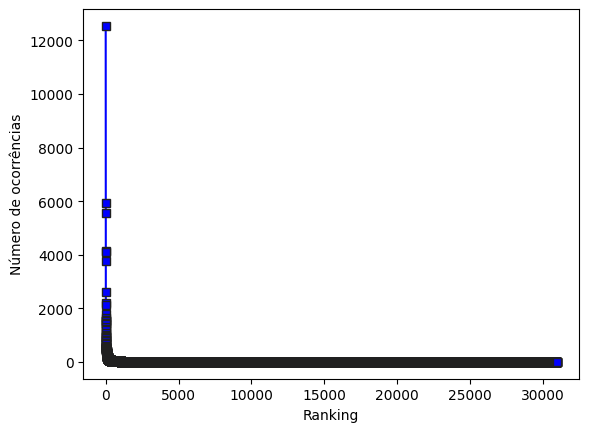

In [ ]:
plt.plot(rank,
         contagem,
         marker='s',
         color='blue',
         markeredgecolor='#202020',)

plt.xlabel('Ranking')
plt.ylabel('Número de ocorrências')

Text(0, 0.5, 'Número de ocorrências')

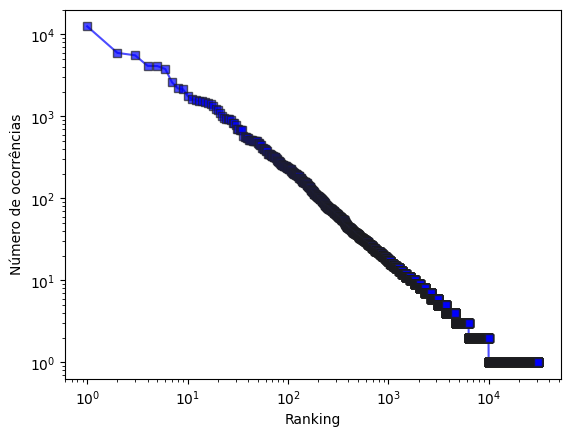

In [ ]:
plt.loglog(rank,
           contagem,
           marker='s',
           color='blue',
           markeredgecolor='#202020',
           alpha=0.7)

plt.xlabel('Ranking')
plt.ylabel('Número de ocorrências')

Previsão da Lei de Zipf:

$$f(w) = C r(w)^{-\alpha}$$

Podemos ajustar a constante C para $r(w)=1$:

$$f(w_1) = C 1^{-\alpha}$$

In [ ]:
C = contagem[0]
C

12544

In [ ]:
alpha=1.
pred = C*rank**(-1.*alpha)

Text(0, 0.5, 'Número de ocorrências')

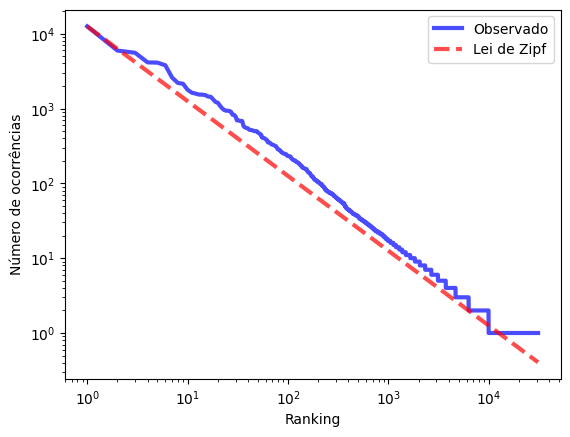

In [ ]:
plt.loglog(rank,
           contagem,
        #    marker='s',
           color='blue',
        #    markeredgecolor='#202020',
           alpha=0.7,
           lw=3,
           label='Observado')

plt.loglog(rank,
           pred,
           color='red',
           alpha=0.7,
           lw=3,
           ls="--",
           label='Lei de Zipf')
plt.legend()
plt.xlabel('Ranking')
plt.ylabel('Número de ocorrências')

In [ ]:
from collections import defaultdict

def estima_lei_zipf(texto):
    """Estima a lei de Zipf usando o texto passado como argumento"""

    texto = ' '.join(texto)

    for c in '!?":;,()\'.*[]“”’':
        texto = texto.replace(c,'')

    texto = texto.replace('—',' ').replace("_"," ")
    texto = texto.replace('―',' ').replace("_"," ")
    texto = texto.replace('--', ' ').replace('\'s', '')
    texto = texto.replace('&', 'and').replace('\n', ' ')
    texto = texto.replace('   ','').replace('  ','').lower()

    palavras = texto.split()

    contador_palavra = defaultdict(int)

    for palavra in palavras:
        contador_palavra[palavra] += 1

    l_contador_palavra = list(zip(list(contador_palavra.values()),
                                list(contador_palavra.keys())))

    l_contador_palavra.sort(reverse=True)

    total_de_palavras = len(l_contador_palavra)

    rank = np.arange(1,total_de_palavras+1)
    contagem = np.asarray([l[0] for l in l_contador_palavra])

    return rank,contagem

In [ ]:
#habilitar font Helvetica
import matplotlib as mpl
from matplotlib import font_manager as fm

!wget http://pfi.uem.br/25anos/files/Helvetica.zip
!unzip Helvetica.zip

fm.fontManager.addfont('Helvetica.ttf')
mpl.rc('font', family='Helvetica')

--2023-12-08 00:51:35--  http://pfi.uem.br/25anos/files/Helvetica.zip
Resolving pfi.uem.br (pfi.uem.br)... 186.233.153.195
Connecting to pfi.uem.br (pfi.uem.br)|186.233.153.195|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1022264 (998K) [application/zip]
Saving to: ‘Helvetica.zip’

Helvetica.zip       100%[===================>] 998.30K  1.02MB/s    in 1.0s    

2023-12-08 00:51:36 (1.02 MB/s) - ‘Helvetica.zip’ saved [1022264/1022264]

Archive:  Helvetica.zip
  inflating: Helvetica.ttf           
  inflating: HelveticaBold.ttf       
  inflating: HelveticaBoldOblique.ttf  
  inflating: HelveticaLight.ttf      
  inflating: HelveticaLightOblique.ttf  
  inflating: HelveticaOblique.ttf    


Text(0, 0.5, 'Número de ocorrências')

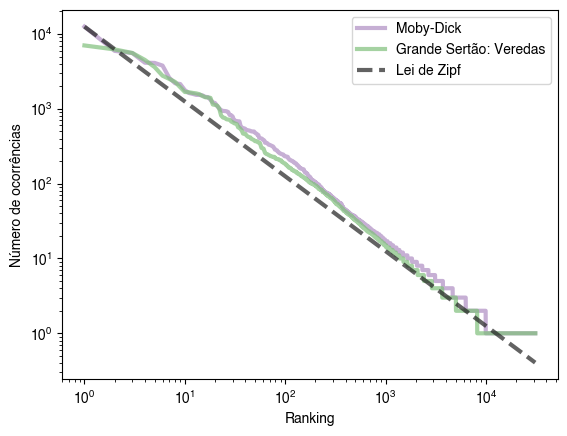

In [ ]:
with open('2701-0.txt','r',encoding='utf-8') as f:
    texto1 = f.readlines()

with open('gsv.txt','r',encoding='utf-8') as f:
    texto2 = f.readlines()

plt.loglog(*estima_lei_zipf(texto1),
           label='Moby-Dick',
           color='#af8dc3',
           lw=3,
           alpha=.7)

plt.loglog(*estima_lei_zipf(texto2),
           label='Grande Sertão: Veredas',
           color='#7fbf7b',
           lw=3,
           alpha=.7)

plt.loglog(rank,
           pred,
           color='#202020',
           alpha=0.7,
           lw=3,
           ls="--",
           label='Lei de Zipf')

plt.legend()

plt.xlabel('Ranking')
plt.ylabel('Número de ocorrências')

## **Syntactic Sugar** (sintaxe adocicada)

Esse tipo de "construção" normalmente torna os códigos mais limpos e simples. Além disso, esse tipo de construção não é essencial para a linguagem. Como exemplos temos:

* k += 1 que é equivalente a k = k + 1
* b[-1\] que é equivalente a b[len(b)-1\]

Vamos ver as *syntactic sugar* mais comuns (algumas já estamos até usando).

**Atalhos para comparação e atribuição**

In [ ]:
#atribuição para múltiplas variáveis
x = y = z = 1

In [ ]:
#atribuição via tuple unpacking
a, b, c = x + 1, 'hello ', -4.5

In [ ]:
#melhor que:
a = x + 1
b = 'hello'
c = -4.5

In [ ]:
#inversão de variáveis sem criar temps
a, b = b, a

In [ ]:
a = b = 3
x = 0

#cadeias de comparações
if a == b == 3:
    print ('a and b both equal 3')

if -1 < x < 1:
    print('x is between -1 and 1')

a and b both equal 3
x is between -1 and 1


In [ ]:
#atribuição condicional
def sinc(x):
    #lembra que 0=False.
    #se for x=zero=False retorna 1 e evita o erro
    return math.sin(x)/x if x else 1

In [ ]:
sinc(1), sinc(0)

(0.8414709848078965, 1)

In [ ]:
#uma outra maneira, menos elegante seria
def sinc2(x):
    try:
        return math.sin(x)/x
    except ZeroDivisionError:
        return 1

In [ ]:
sinc2(1), sinc2(0)

(0.8414709848078965, 1)

**List Comprehension**

É um tipo de construção usada para criar listas com base em outro iterável.

In [ ]:
xlist = [1, 2, 3, 4, 5, 6]
x2list = [x**2 for x in xlist]
x2list

[1, 4, 9, 16, 25, 36]

In [ ]:
#outra maneira seria
x2list = []
for x in xlist:
    x2list.append(x**2)

In [ ]:
xlist = np.arange(1,1000,1)

In [ ]:
%%timeit
x2list = [x**2 for x in xlist]

116 µs ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%%timeit
x2list = []
for x in xlist:
    x2list.append(x**2)

123 µs ± 27.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


List Comprehension são mais rápidas.

Além disso, elas podem conter expressões condicionais:

In [ ]:
xlist = [1, 2, 3, 4, 5, 6]
x2list = [x**2 for x in xlist if x % 2]
#x**2 é calculado apenas quando x % 2 não for zero (x é ímpar)

In [ ]:
x2list

[1, 9, 25]

Podemos usar também a construção if...else:

In [ ]:
[x**2 if x % 2 else x**3 for x in xlist]
#x**2 é calculado apenas quando x % 2 não for zero (x é ímpar)
#caso contrário, calcula-se x**3

[1, 8, 9, 64, 25, 216]

Podemos usar qualquer objeto iterável numa list comprehension:

In [ ]:
#range
[x**3 for x in range(1,10)]

[1, 8, 27, 64, 125, 216, 343, 512, 729]

In [ ]:
#string
[w.upper() for w in 'abc xyz']

['A', 'B', 'C', ' ', 'X', 'Y', 'Z']

Também podemos fazer list comprehension dentro de list comprehension:

In [ ]:
vlist = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [ ]:
#o primeiro loop "for v in vlist" varre os elementos [...]
#o segundo loop "for c in v" varre os valores de cada elemento [...]
[c for v in vlist for c in v]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

*Exemplo E4.10:* Transpor uma matrix.

In [ ]:
M = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

In [ ]:
#sem list comprehension
MT = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for linha in range(3):
    for coluna in range(3):
        MT[coluna][linha] = M[linha][coluna]

In [ ]:
MT

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]

In [ ]:
#com list comprehension
#quando i=1, vamos varrer as linhas pegando o primeiro elemento
#quando i=2, vamos varrer as linhas pegando o segundo elemento, etc
MT = [[row[i] for row in M] for i in range(3)]

In [ ]:
MT

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]

In [ ]:
np.asarray(M).T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [ ]:
#porém, com o numpy!
np.transpose(M)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

**Funções lambda**

Funções lambda são uma maneira de definir funções simples sem usar o def. Essas funções não podem conter bloco de códigos. Por exemplo:


In [ ]:
f = lambda x: x**2 - 3*x + 2

In [ ]:
f

<function __main__.<lambda>(x)>

In [ ]:
f(4.)

6.0

No exemplo anterior, o argumento da função (x) é definido logo após a palavra reservada *lambda*. Também podemos passar mais de um argumento:

In [ ]:
f = lambda x,y: x**2 + 2*x*y + y**2

In [ ]:
f(2.,3.)

25.0

Nesse último exemplo, a função equivalente usando o def seria:

In [ ]:
def g(x,y):
    return x**2 + 2*x*y + y**2

In [ ]:
g(2.,3.)

25.0

*Exemplo E4.11*: Definindo uma lista de funções.

In [ ]:
#sem lambda
def const (x):
    return 1.
def lin(x):
    return x
def square (x):
    return x**2
def cube(x):
    return x**3

flist = [const , lin , square , cube]

In [ ]:
flist[0](10)

1.0

In [ ]:
#com lambda

flist = [lambda x: 1,
         lambda x: x,
         lambda x: x**2,
         lambda x: x**3]

In [ ]:
flist[2](10)

100

*Exemplo E4.12:* Argumento *key* da função *sorted*.

In [ ]:
lista = ['expects', 'Inquisition', 'Nobody', 'Spanish', 'the']

In [ ]:
#note que "expects" deveria vir primeiro
#mas fica por último por conta do case
sorted(lista)

['Inquisition', 'Nobody', 'Spanish', 'expects', 'the']

In [ ]:
#mudando isso com o parâmetro key
#o retorno da função lambda é usando para ordenar
sorted(lista, key=lambda x: x.lower())

['expects', 'Inquisition', 'Nobody', 'Spanish', 'the']

In [ ]:
#ordenando pelo segundo char
sorted(lista, key=lambda x: x[1])

['the', 'Inquisition', 'Nobody', 'Spanish', 'expects']

In [ ]:
halogens = [('At', 85) , ('Br', 35) , ('Cl', 17) , ('F', 9), ('I', 53)]

In [ ]:
sorted(halogens)

[('At', 85), ('Br', 35), ('Cl', 17), ('F', 9), ('I', 53)]

In [ ]:
#ordenando pelo segundo elemento
sorted(halogens, key=lambda x: x[1])

[('F', 9), ('Cl', 17), ('Br', 35), ('I', 53), ('At', 85)]

**Comando with**

O *with* cria um bloco de códigos que é executado dentro de um "contexto". Um uso muito comum (que já fizemos) é para abrir arquivos:

In [ ]:
with open('gsv.txt') as f:
    lines = f.readlines()

Nesse caso, não é preciso fechar o arquivo, uma vez que ele foi aberto dentro de um contexto.

In [ ]:
a = range(1,10)

In [ ]:
a

range(1, 10)

**Geradores**

Geradores são funções que se comportam como um objeto iterável. Um exemplo de gerador é o *range()*. Esse tipo de construção tem como vantagem a execução sob demanda da função. Para construir um gerador usamos o *yield* no lugar do *return* em uma função.

In [ ]:
def count(n):
    i = 0
    while i<n:
        i+=1
        yield i

In [ ]:
#note que um genaro não pode ser chamado como uma função usual
count(5)

<generator object count at 0x7e7b3f989700>

In [ ]:
#é preciso iterar e cada passo vamos tendo um retorno
for j in count(5):
    print(j)

1
2
3
4
5


In [ ]:
teste = count(6)

In [ ]:
teste

<generator object count at 0x7e7b3f9894d0>

In [ ]:
#executar várias vezes
next(teste)

StopIteration: ignored

In [ ]:
#também podemos listar um gerador
list(count(6))

*Exemplo E4.13*: [Números triangulares](https://en.wikipedia.org/wiki/Triangular_number):

$$
T_n = \sum_{k=1}^{n}k = 1+2+3+\dots+n
$$
são números que podem ser arranjados em triângulo equilátero.


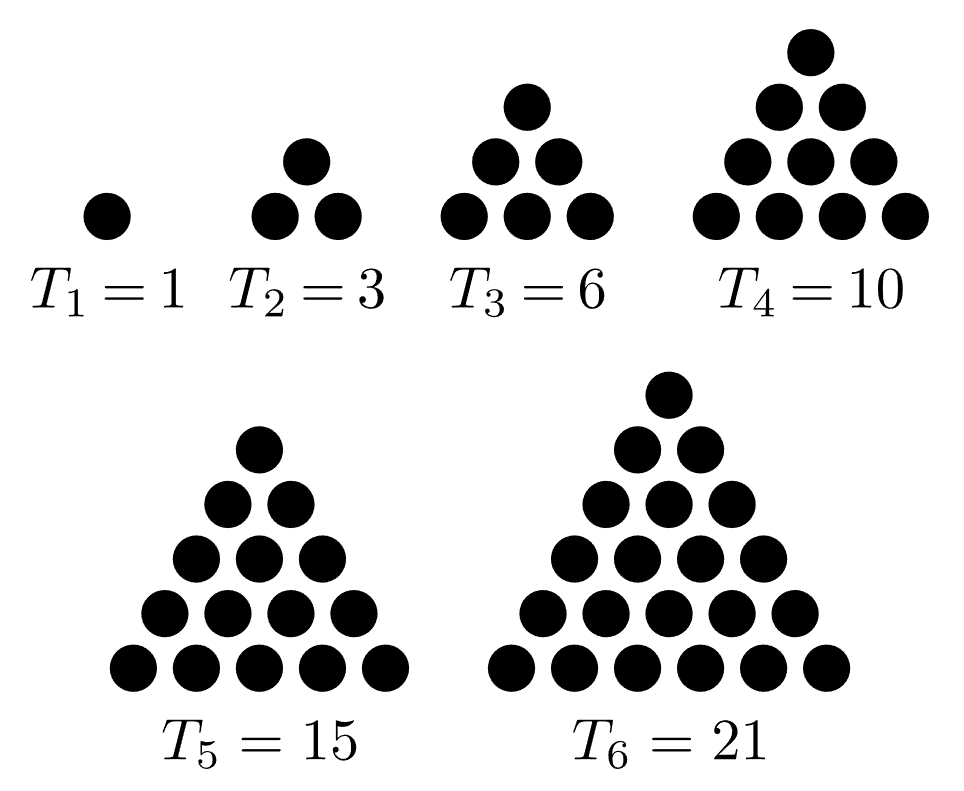

Vamos fazer um gerador deles:

In [ ]:
def n_triangular(n):
    i, t = 1,0
    while i<=(n+1):
        if t>0:
            yield t
        t += i
        i += 1

In [ ]:
#note que ao chamar a função definimos o gerador
#e cada passo corresponde a uma passada pelo yield
list(n_triangular(6))

[1, 3, 6, 10, 15, 21]

**A função map**

A função *map* gera um iterador que aplica uma dada função a cada item de uma lista. Por exemplo, podemos somar o elementos de uma lista de listas via:

In [ ]:
lista = [[1, 2, 3], [10, 20, 30] , [25, 75, 100]]

In [ ]:
#note que é um gerador
map(sum, lista)

In [ ]:
g_ = map(sum, lista)

In [ ]:
next(g_)

200

In [ ]:
#podemos listar todos os valores
list(map(sum, lista))

[6, 60, 200]

In [ ]:
#usando list comprehension
[sum(l) for l in lista]

[6, 60, 200]

In [ ]:
%%timeit
list(map(sum, lista))

342 ns ± 77.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit
[sum(l) for l in lista]

341 ns ± 6.58 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


List comprehension costuma ser mais rápido e o uso do map pode tornar os códigos mais obscuros, principalmente quando combinados com outros geradores como o filter:

In [ ]:
list(filter(lambda x: x%2, range(10)))

[1, 3, 5, 7, 9]

In [ ]:
[x for x in range(10) if x % 2]

[1, 3, 5, 7, 9]

Exemplo: Códigos em paralelo com o multiprocessing.

In [ ]:
!pip install colab-xterm
%load_ext colabxterm
%xterm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 1.7 MB/s eta 0:00:00


Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

In [ ]:
dados_soma = np.random.normal(size=(1000,3))

In [ ]:
dados_soma

array([[-0.01373307,  0.96306818,  0.27132979],
       [-0.58023367,  0.8784204 ,  0.26330344],
       [-0.24300108, -0.02828086,  0.83111674],
       ...,
       [-1.32538789,  1.45620104,  2.3221119 ],
       [ 0.0325291 , -0.3364655 ,  0.76288241],
       [ 0.19773157,  0.86186821, -1.76096387]])

In [ ]:
%%timeit
res_lc = [sum(l) for l in dados_soma]

935 µs ± 9.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
res_map = list(map(sum, dados_soma))

975 µs ± 223 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
from multiprocessing import Pool
pool = Pool()

In [ ]:
pool.map()

In [ ]:
%%timeit
res_pmap = pool.map(sum, dados_soma)

9.78 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
pool.close()

**O operador "Walrus"**

É o operador que atribui e retorna o valor. Só está disponível para Python>3.8!

Conside o código abaixo que verifica o comprimento de uma string:

In [ ]:
a = 1

In [ ]:
b

1

In [ ]:
(b := 1)

1

In [ ]:
s = 'Um string com muitos caracteres!'
if len(s)>10:
    print(f"s tem {len(s)} caracteres. O limite é 10!")

s tem 32 caracteres. O limite é 10!


O problema com esse código é que calculamos len(s) duas vezes. Seria melhor:

In [ ]:
s = 'Um string com muitos caracteres!'
slen = len(s)
if slen>10:
    print(f"s tem {slen} caracteres. O limite é 10!")

s tem 32 caracteres. O limite é 10!


Porém, podemos usar o operador "walrus" ':=', o qual atribui e retorna o valor atribuído:

In [ ]:
if (slen := len(s)) > 10:
    print(f"s tem {slen} caracteres. O limite é 10!")

s tem 32 caracteres. O limite é 10!


In [ ]:
#note que um '=' não funciona.
if (slen = len(s)) > 10:
    print(f"s tem {slen} caracteres. O limite é 10!")

SyntaxError: ignored

*Exemplo E.4.14:* Uma boa aplicação do ':=' e o reuso que algum valor que é custoso para ser calculado.

Suponha que *f(x)* seja uma função demorada.

In [ ]:
import time

def f(x):
    print('calculada!')
    time.sleep(.25)
    return x**3


In [ ]:
valores = np.arange(-5,5,1)

In [ ]:
#nesse código, f(x) é calculada duas vezes
valores_filtrados = [f(x) for x in valores if f(x) >= 0]

calculada!
calculada!
calculada!
calculada!
calculada!
calculada!
calculada!
calculada!
calculada!
calculada!
calculada!
calculada!
calculada!
calculada!
calculada!


In [ ]:
#nesse código, apenas uma!
valores_filtrados = [val for x in valores if (val := f(x)) >= 0]

calculada!
calculada!
calculada!
calculada!
calculada!
calculada!
calculada!
calculada!
calculada!
calculada!


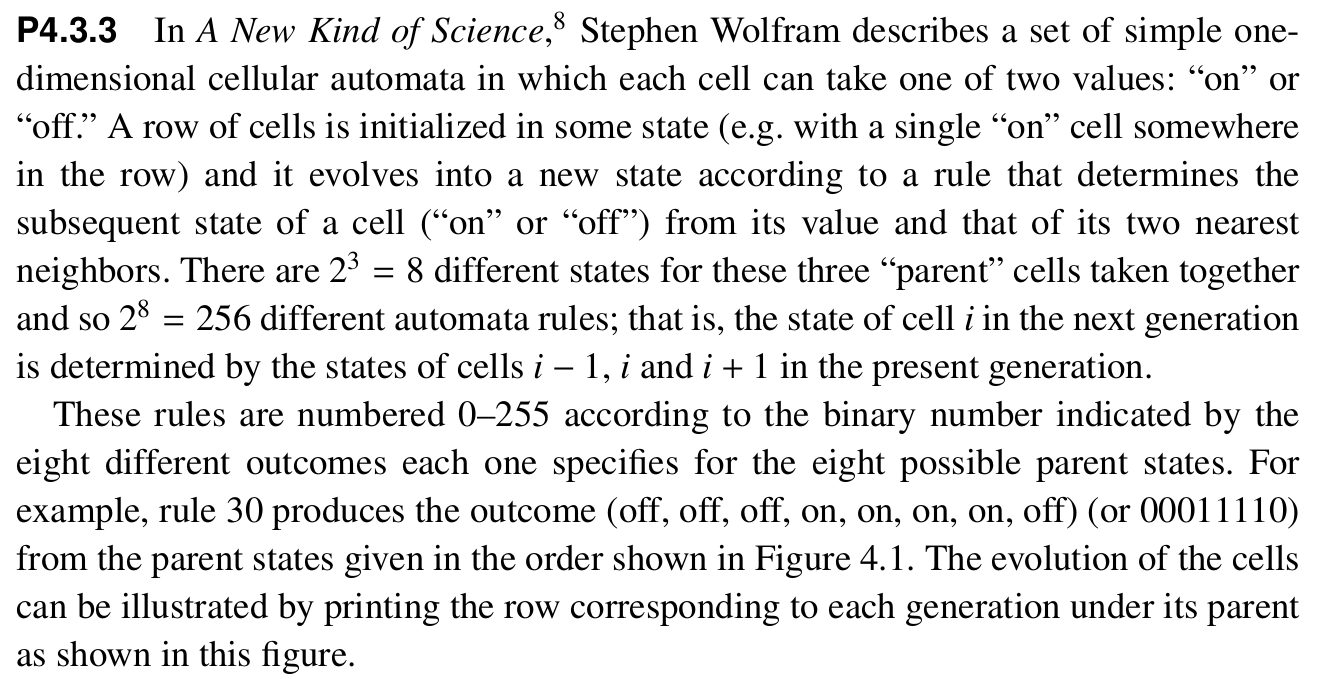

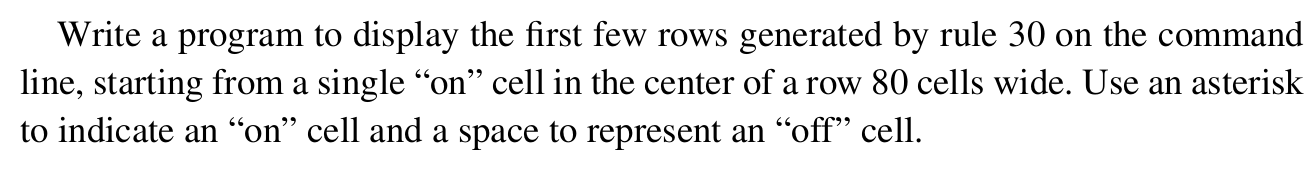

*Problema P4.3.3* [Autômata celular](https://en.wikipedia.org/wiki/Elementary_cellular_automaton): Regra 30 de Wolfram.


Autômatas celulares simples podem ser pensados com arrays 1d com valores 0 ou 1 (ligado ou desligado) e uma regra para gerar o próximo estado com base nos valores da célula atual e dos seus vizinhos mais próximos.

* existem $2^3=8$ possibilidades para cada célula com seus vizinhos;
* a regra do autômata deve especificar o resultado para cada uma dessas 8 configurações;
* como o resultado de cada configuração tem duas duas possibilidades, existem $2^8=256$ possíveis regras (nomeadas de 0 a 255).

A regra 30 é:

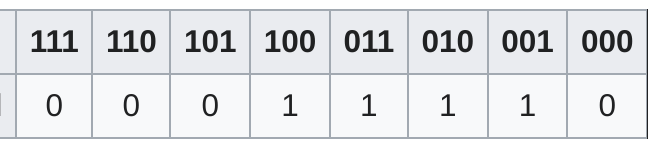

'00011110' a qual representa o número 30 na base 10!

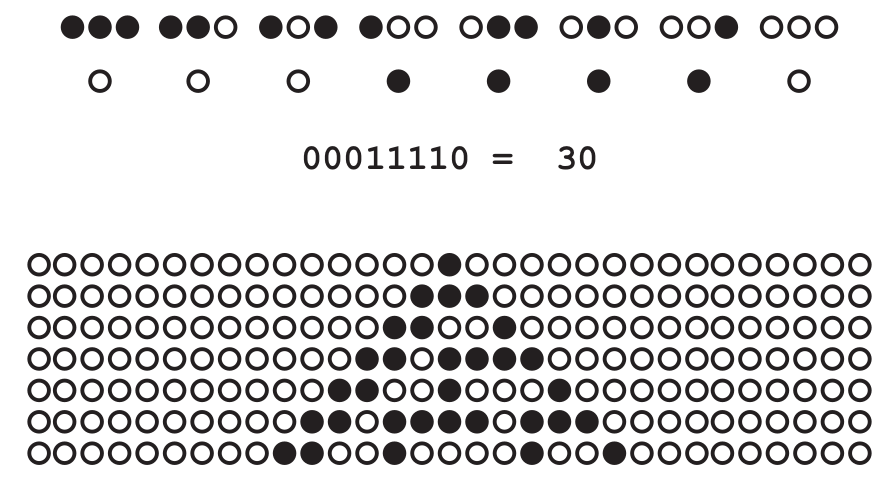

In [ ]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/e/e2/One-d-cellular-automate-rule-30.gif')


Vamos fazer um programa que implementa essa regra:

In [ ]:
import numpy as np

In [ ]:
tamanho  = 80
geracoes = 32

estado = np.zeros(shape=(tamanho),dtype=int)
estado[39] = 1
# estado = (np.random.uniform(size=tamanho)<0.5).astype(int)

In [ ]:
estado

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
possibilidades = [[1,1,1],[1,1,0],[1,0,1],[1,0,0],[0,1,1],[0,1,0],[0,0,1],[0,0,0]]
str_possibilidades = [str(p[0])+str(p[1])+str(p[2]) for p in possibilidades]

In [ ]:
str_possibilidades

['111', '110', '101', '100', '011', '010', '001', '000']

In [ ]:
np.binary_repr(30, 8)

'00011110'

In [ ]:
regra = [int(d) for d in np.binary_repr(30, 8)]
regra

[0, 0, 0, 1, 1, 1, 1, 0]

In [ ]:
dict_regra = dict(zip(str_possibilidades,regra))
dict_regra

{'111': 0,
 '110': 0,
 '101': 0,
 '100': 1,
 '011': 1,
 '010': 1,
 '001': 1,
 '000': 0}

In [ ]:
#lista com todas as estados:
estados = []
estados.append(estado)

#faz as iteracoes
for _ in range(geracoes):
    #cria o vetor para o novo estado:
    novo_estado = np.zeros(shape=(tamanho))
    #ignoramos as bordas!
    for i in range(1,tamanho-1):
        pos_regra = str(int(estado[i-1]))+str(int(estado[i]))\
                    +str(int(estado[i+1]))
        novo_estado[i] = dict_regra[pos_regra]
    #atualizamos o estado
    estado = novo_estado
    #salvamos a configuracao
    estados.append(estado)

Text(0.5, 0, 'Posição')

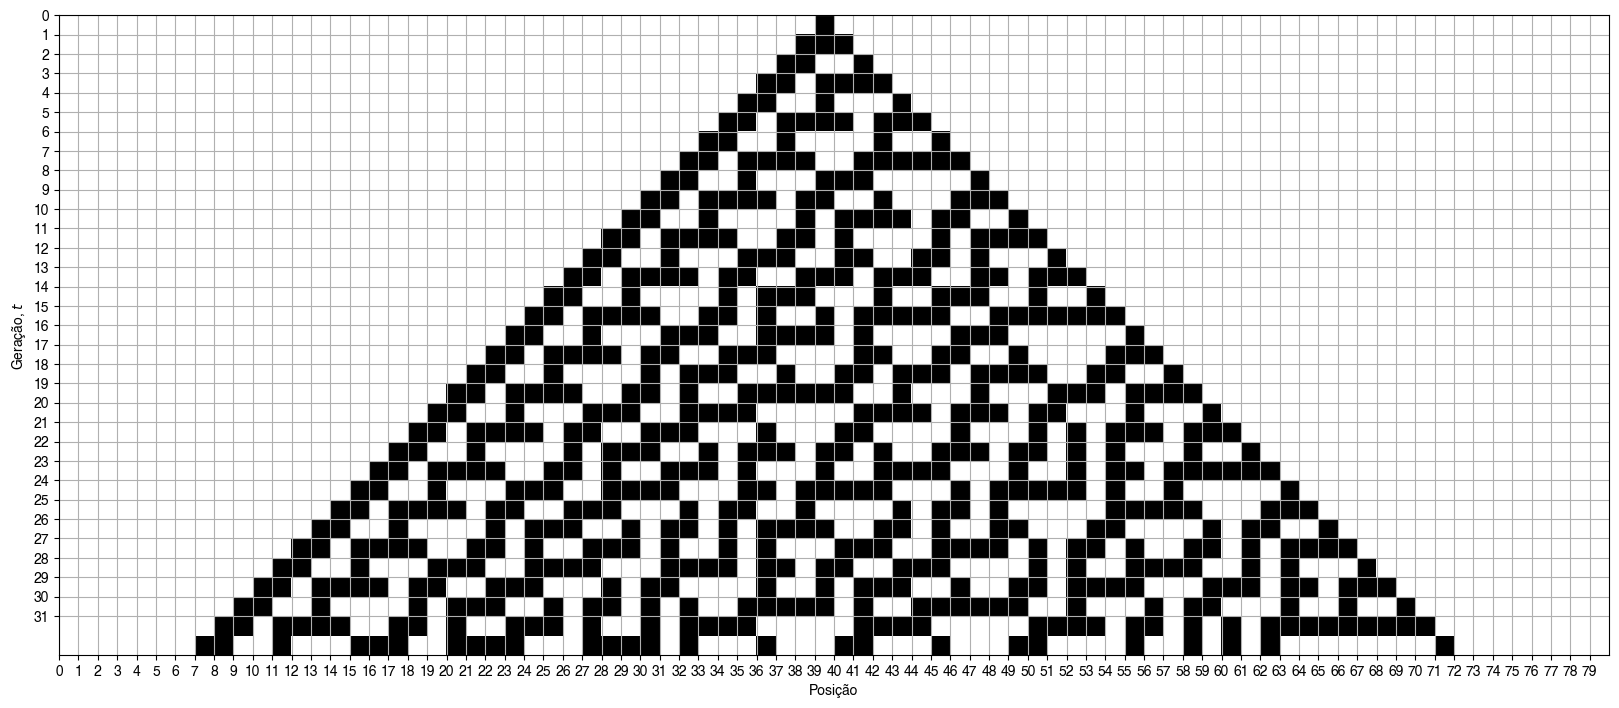

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(estados,cmap='Greys')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xticks(np.arange(0,tamanho)-0.5,np.arange(0,tamanho));
plt.yticks(np.arange(0,geracoes)-0.5,np.arange(0,geracoes));

plt.ylabel('Geração, $t$')
plt.xlabel('Posição')

Encapsulando tudo:

In [ ]:
def automata(nregra=30, tamanho=80, geracoes=32):
    """
    Retorna a evolução do automata de Wolfram para uma dada regra.
    """
    estado = np.zeros(shape=(tamanho),dtype=int)
    estado = (np.random.uniform(size=tamanho)<0.1).astype(int)

    possibilidades = [[1,1,1],[1,1,0],[1,0,1],[1,0,0],[0,1,1]
                      ,[0,1,0],[0,0,1],[0,0,0]]

    str_possibilidades = [str(p[0])+str(p[1])+str(p[2]) for p in possibilidades]

    regra = [int(d) for d in np.binary_repr(nregra, 8)]
    dict_regra = dict(zip(str_possibilidades,regra))


    #lista com todas as estados:
    estados = []
    estados.append(estado)

    #faz as iteracoes
    for _ in range(geracoes):
        #cria o vetor para o novo estado:
        novo_estado = np.zeros(shape=(tamanho))
        #ignoramos as bordas!
        for i in range(0,tamanho):
            #condicoes periodicas de contorno
            if i-1<0:
                anterior = tamanho-1
            else:
                anterior = i-1
            if i+1>tamanho-1:
                proximo = 0
            else:
                proximo = i+1
            pos_regra = str(int(estado[anterior]))+str(int(estado[i]))\
                        +str(int(estado[proximo]))
            novo_estado[i] = dict_regra[pos_regra]
        #atualizamos o estado
        estado = novo_estado
        #salvamos a configuracao
        estados.append(estado)

    return estados

Text(0.5, 0, 'Posição')

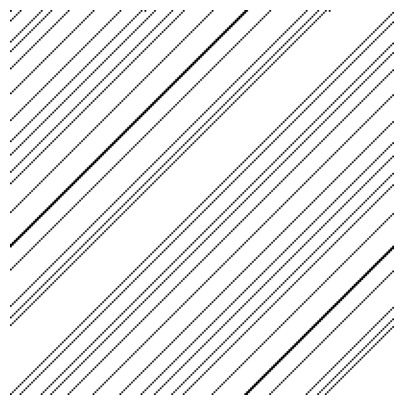

In [ ]:
geracoes = 200
tamanho = 200
plt.figure(figsize=(5,5))
plt.imshow(automata(nregra=138, tamanho=tamanho, geracoes=geracoes),cmap='Greys')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.ylabel('Geração, $t$')
plt.xlabel('Posição')

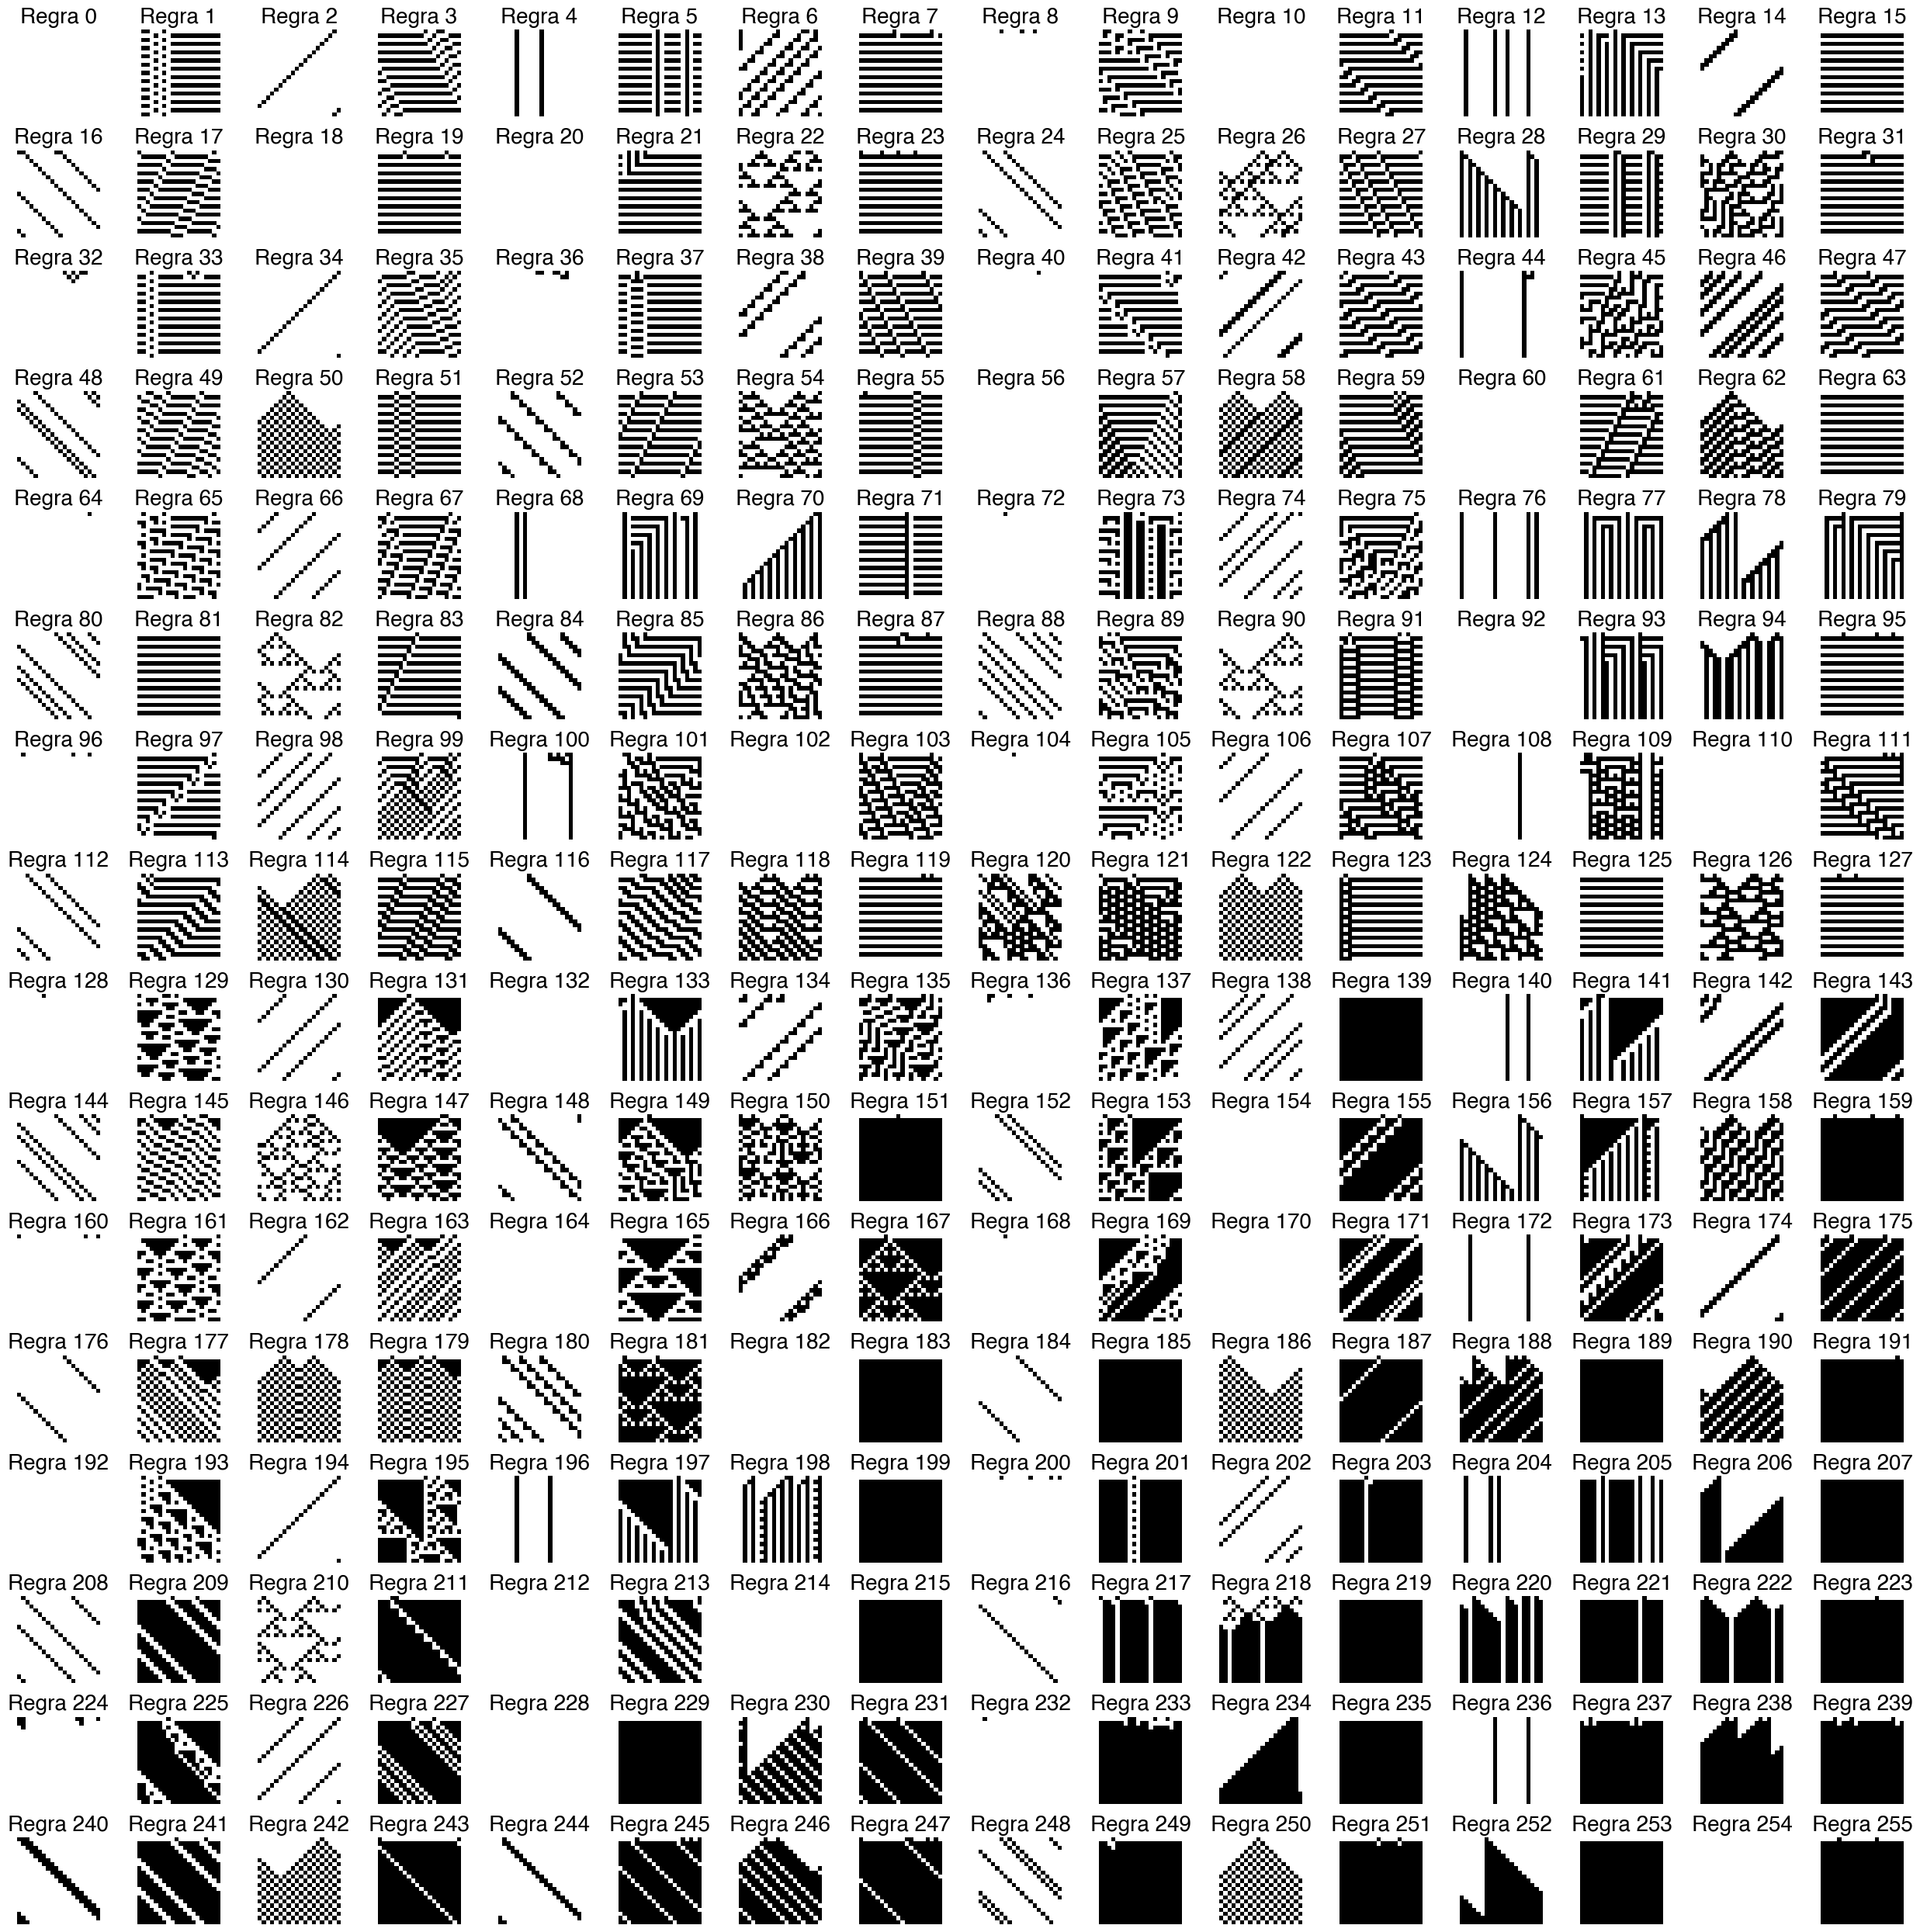

In [ ]:
f, ax = plt.subplots(ncols=16, nrows=16, figsize=(25,25))

ax = ax.flatten()

for i, ax_ in enumerate(ax):
    ax_.imshow(automata(nregra=i,
                       tamanho=20,
                       geracoes=20),
              cmap='Greys')
    ax_.set_axis_off()
    ax_.set_title(f'Regra {i}',fontsize=20)

f.tight_layout()